# LetsGrowMoreVIP - Data Science Intern
# Author - Archita K
# More Advanced Level Task - ML Facial recognition to detect mood and suggest songs accordingly

# Importing the Modules

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import cv2
import warnings
warnings.filterwarnings('ignore')

# Training

In [2]:
train_dir = "train"
test_dir = "test"

In [3]:
img_size = 48

In [4]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [5]:
train_generator = train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator = validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [6]:
model = tf.keras.Sequential([

        # input layer
        tf.keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape=(48,48,1)),
        tf.keras.layers.Conv2D(64,(3,3), padding='same', activation='relu' ),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        # 1st hidden dense layer
        tf.keras.layers.Conv2D(128,(5,5), padding='same', activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 2nd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # 3rd hidden dense layer
        tf.keras.layers.Conv2D(512,(3,3), padding='same', activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
    
        # Flatten layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
    
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.25),
        # output layer
        tf.keras.layers.Dense(7, activation='softmax')
    ])

In [7]:
optimiser = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimiser,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 batch_normalization (BatchN  (None, 46, 46, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 23, 23, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 23, 23, 128)       2

In [8]:
history = model.fit(x = train_generator,epochs = 20,validation_data = validation_generator,batch_size=64)

Epoch 1/20
359/359 [==============================] - 523s 1s/step - loss: 9.3395 - accuracy: 0.1865 - val_loss: 8.7334 - val_accuracy: 0.2472
Epoch 2/20
359/359 [==============================] - 522s 1s/step - loss: 8.3334 - accuracy: 0.2098 - val_loss: 7.5891 - val_accuracy: 0.2465
Epoch 3/20
359/359 [==============================] - 494s 1s/step - loss: 7.3596 - accuracy: 0.2404 - val_loss: 6.6427 - val_accuracy: 0.2786
Epoch 4/20
359/359 [==============================] - 565s 2s/step - loss: 6.4254 - accuracy: 0.2583 - val_loss: 5.7315 - val_accuracy: 0.3408
Epoch 5/20
359/359 [==============================] - 517s 1s/step - loss: 5.5360 - accuracy: 0.3015 - val_loss: 5.2611 - val_accuracy: 0.3017
Epoch 6/20
359/359 [==============================] - 541s 2s/step - loss: 4.7898 - accuracy: 0.3348 - val_loss: 4.2262 - val_accuracy: 0.4036
Epoch 7/20
359/359 [==============================] - 571s 2s/step - loss: 4.1503 - accuracy: 0.3618 - val_loss: 3.7427 - val_accuracy: 0.3987

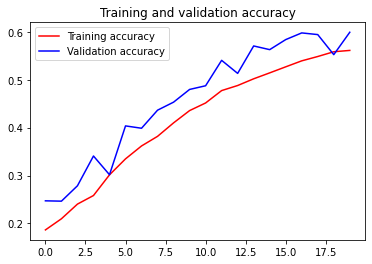

<Figure size 432x288 with 0 Axes>

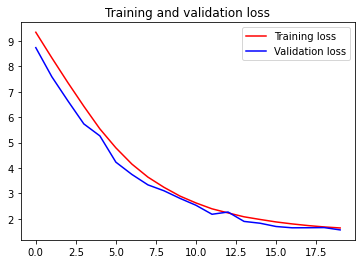

In [9]:
accuracy = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.show()

In [10]:
model.save('model_fer2013.h5')

In [11]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

23/23 [==============================] - 9s 386ms/step - loss: 1.5603 - accuracy: 0.5992
final train accuracy = 59.66 , validation accuracy = 59.92


# Testing
# Detecting Face

(48, 48)


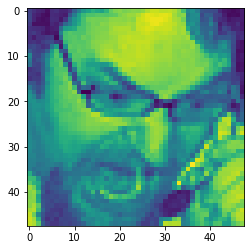

In [17]:
img = image.load_img("test/angry/PrivateTest_10131363.jpg",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

# Prediction

In [18]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [19]:
img = np.expand_dims(img,axis = 0) 
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

[1.0, 0.0, 0.0, 0.0, 9.45129e-22, 0.0, 0.0]


In [20]:
img_index = result.index(max(result))
print(label_dict[img_index])
plt.show()

Angry


In [21]:
model.save_weights('model_weights.h5')

# Song Playing as per mood

In [1]:
from IPython.display import Audio
song_path = 'Audios'
song = os.path.join(song_path,emotion)
print(f'Playing {emotion} song')
Audio(song + '.mp3', autoplay=True)

Playing Angry song
